In [4]:
#importing libraries
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import folium
plt.rcParams["figure.dpi"]=200

In [5]:
#!pip install geopandas

In [6]:
#!pip install folium

In [33]:
countries = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/_8/stsrqpjs1q1559jp3dtpqv0c0000gn/T/ipykernel_7735/1433061391.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

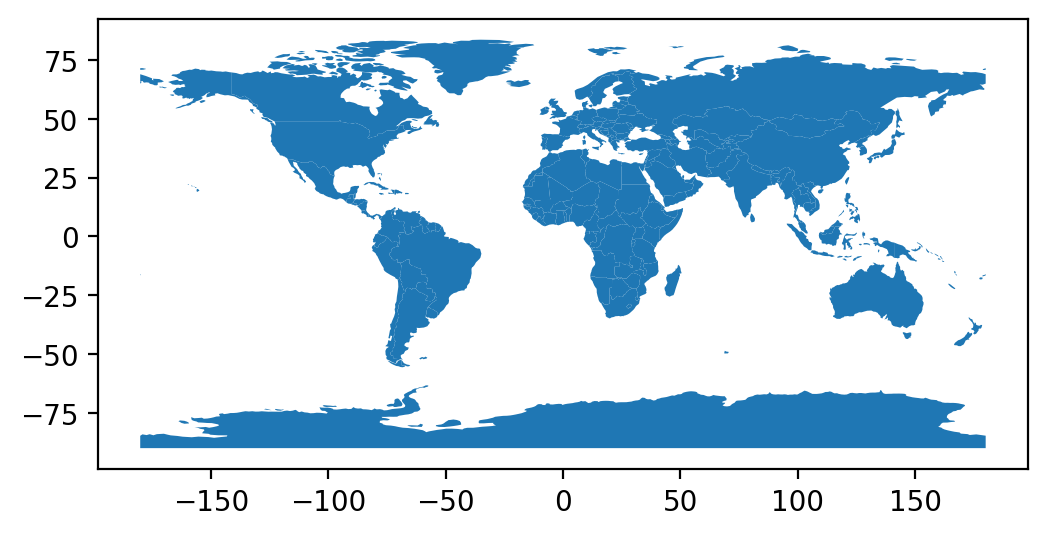

In [34]:
countries.plot()

#  Data Structure

In [35]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [36]:
type(countries.name)

pandas.core.series.Series

In [37]:
countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

<AxesSubplot:>

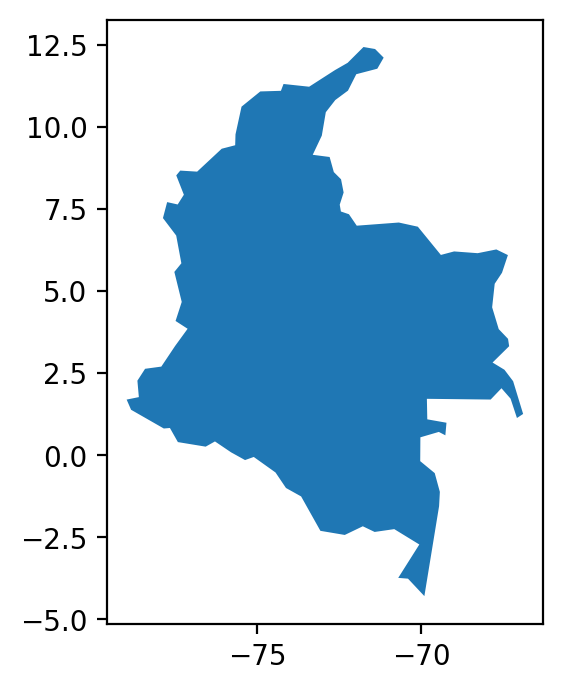

In [38]:
countries.loc[countries['name']=="Colombia"].plot()

In [39]:
countries.loc[countries['name']=="Colombia"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."


In [40]:
m = folium.Map([10, -75], zoom_start=6, tiles='Stamen Terrain')
folium.GeoJson(countries.to_json()).add_to(m)
m

# Adding Point Data /Cities

In [41]:
cities = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
cities.head()

/var/folders/_8/stsrqpjs1q1559jp3dtpqv0c0000gn/T/ipykernel_7735/2061851663.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


<AxesSubplot:>

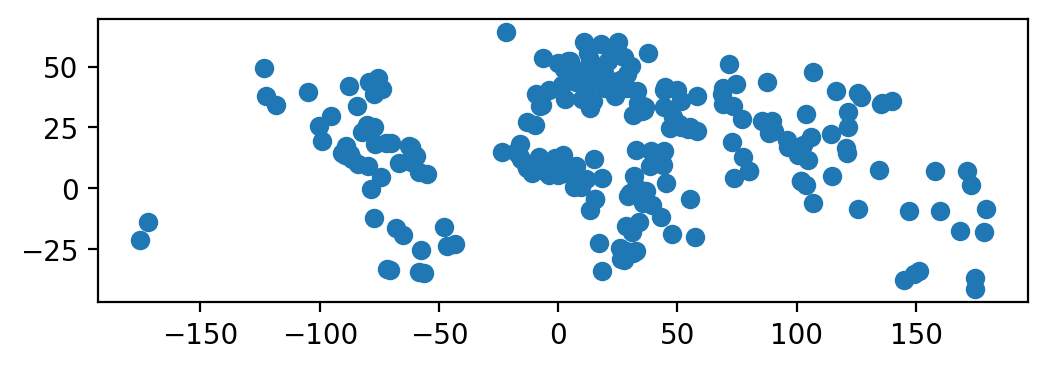

In [42]:
cities.plot()

<AxesSubplot:>

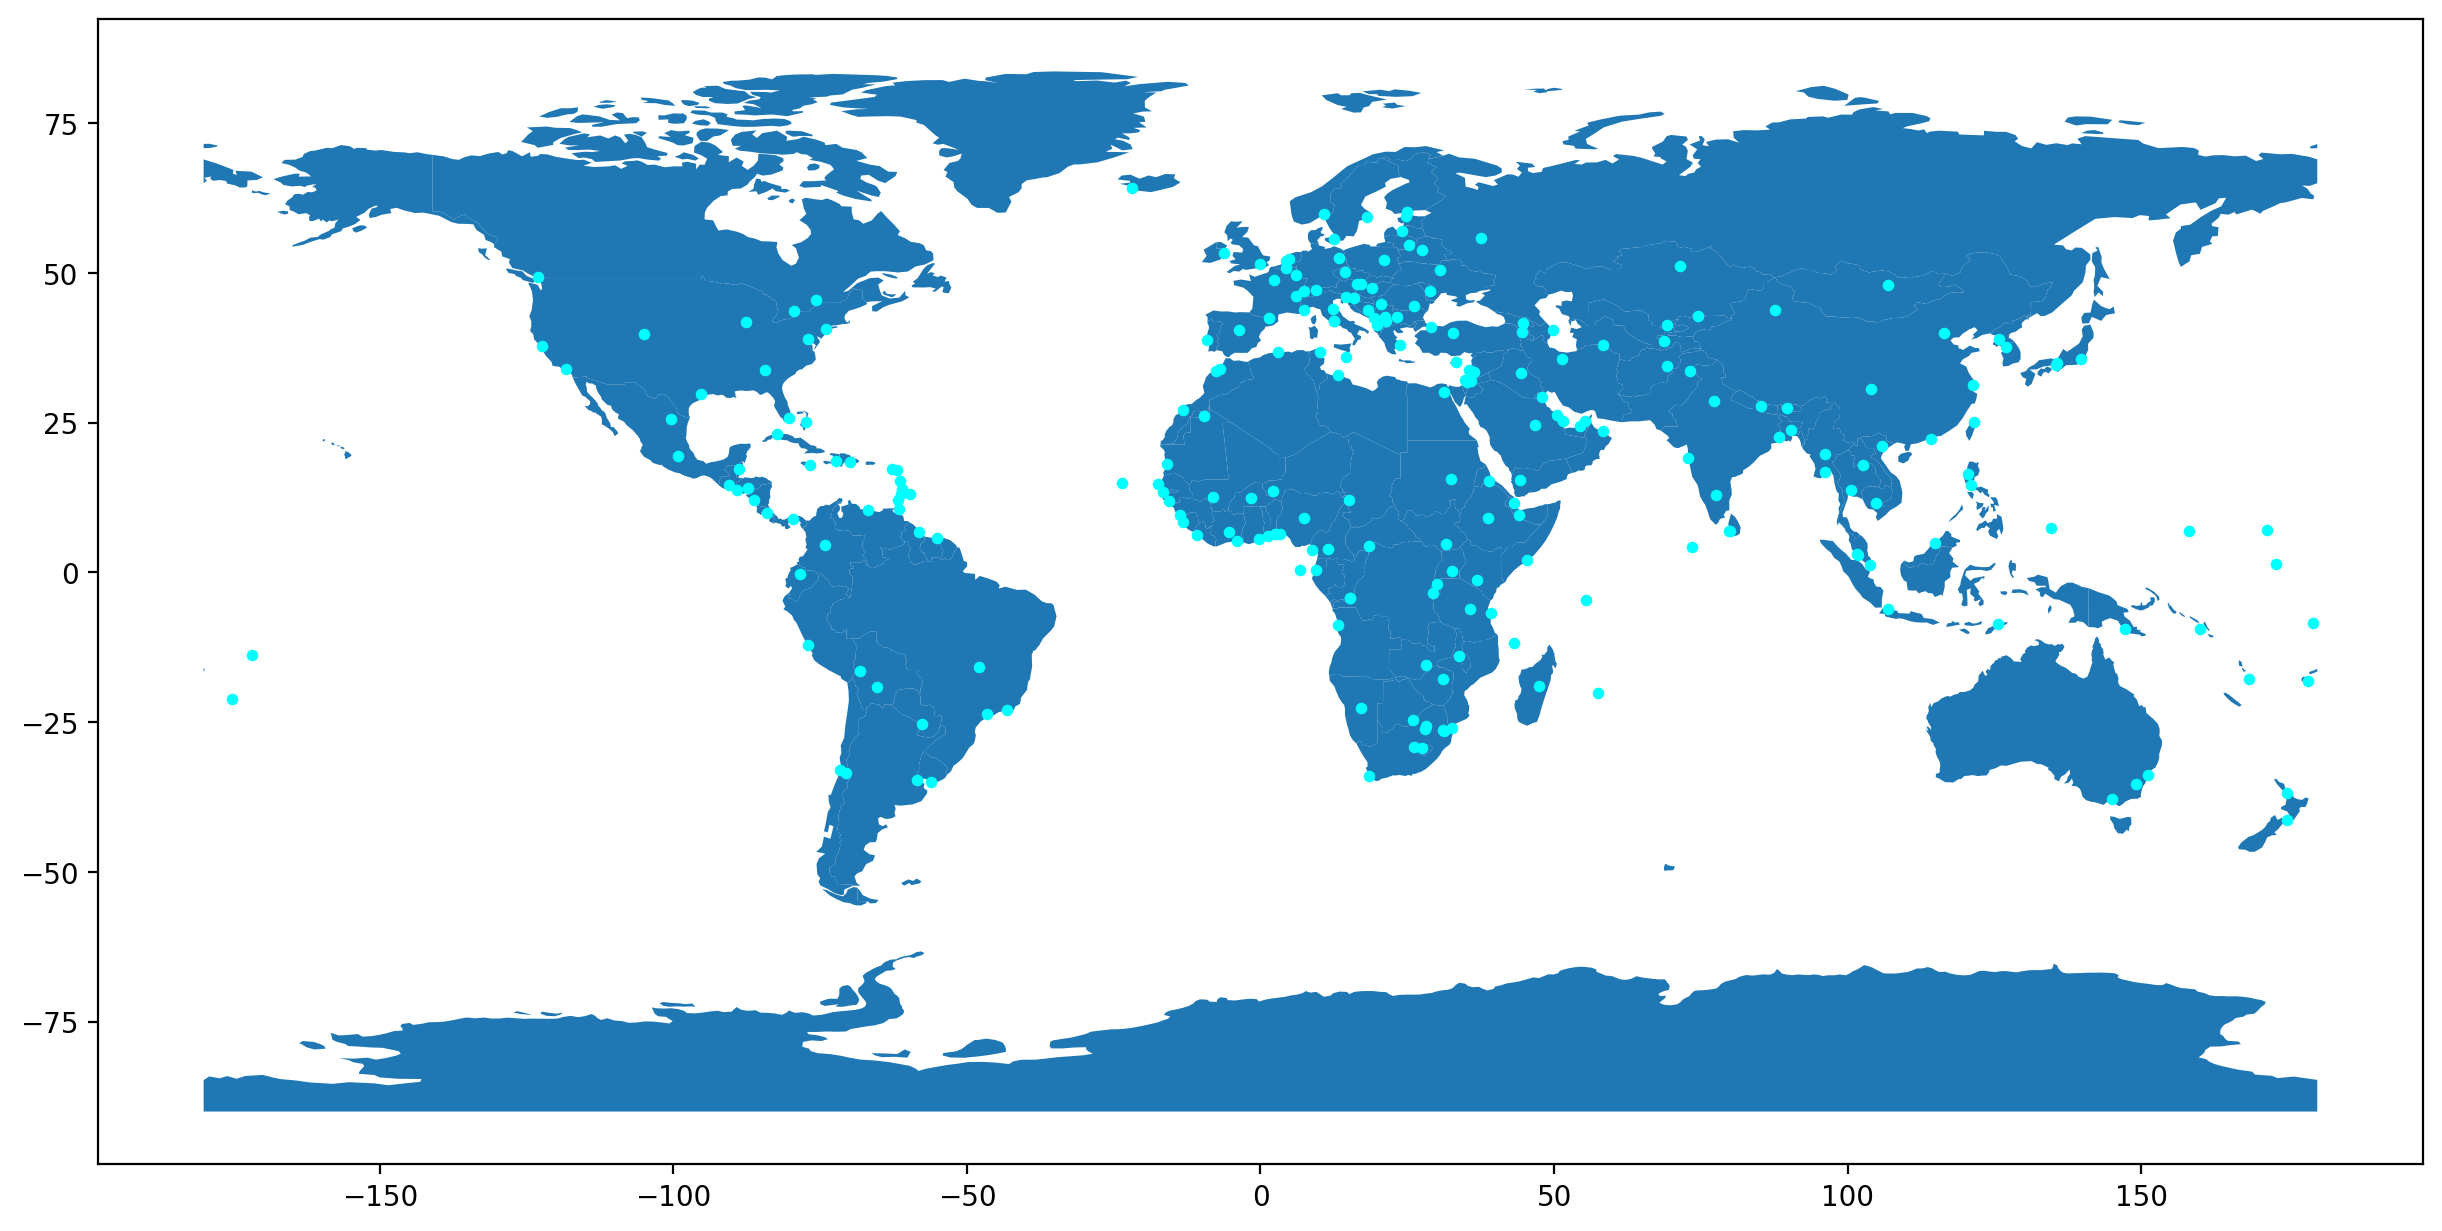

In [43]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='cyan', markersize=10)

In [44]:
m = folium.Map([10, -75], zoom_start=6, tiles='Stamen Toner')
map_Oslo= folium.GeoJson(cities.to_json()).add_to(m)
map_Oslo.save("map.html")

In [45]:
cities['long']=cities.geometry.x
cities['lat']= cities.geometry.y
cities.tail()
cities.head()

,name,geometry,long,lat
0,Vatican City,POINT (12.45339 41.90328),12.453387,41.903282
1,San Marino,POINT (12.44177 43.93610),12.441770,43.936096
2,Vaduz,POINT (9.51667 47.13372),9.516670,47.133724
3,Lobamba,POINT (31.20000 -26.46667),31.199997,-26.466667
4,Luxembourg,POINT (6.13000 49.61166),6.130003,49.611660


In [46]:
cities['sz']= range(0, 243)

In [47]:
cities['sz']=cities['sz']/2

In [48]:
cities.tail()

,name,geometry,long,lat,sz
238,Rio de Janeiro,POINT (-43.21212 -22.90731),-43.212117,-22.907308,119.0
239,São Paulo,POINT (-46.62697 -23.55673),-46.626966,-23.556734,119.5
240,Sydney,POINT (151.21255 -33.87137),151.212548,-33.871373,120.0
241,Singapore,POINT (103.85387 1.29498),103.853875,1.294979,120.5
242,Hong Kong,POINT (114.18306 22.30693),114.183064,22.306927,121.0


In [49]:
import plotly.express as px
fig = px.scatter_mapbox(cities, 
                       lat="lat",
                       lon="long",
                       hover_name="name",
                       hover_data=["name"],
                       color="name",
                       zoom=1,
                       height=600,
                       size="sz",
                        #size_max=30,
                       opacity=0.8,
                       width=1300)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(title_text="just a viz")
fig.show()

# CRS, area

<AxesSubplot:>

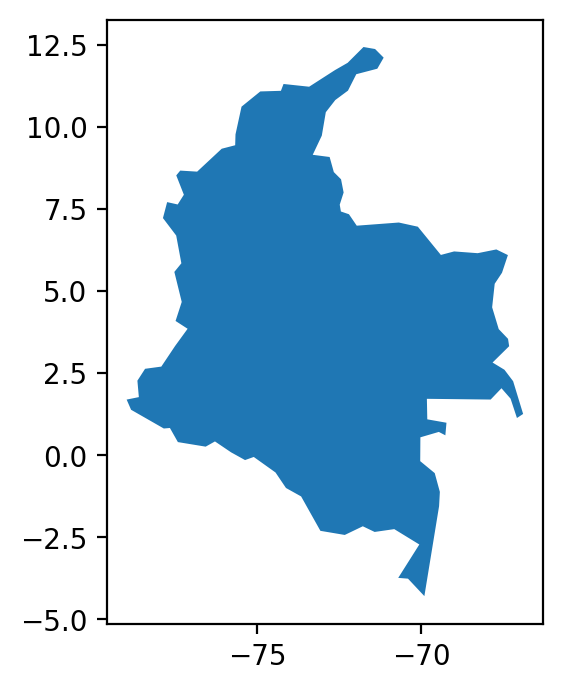

In [50]:
countries.loc[countries['name']=="Colombia"].plot()

In [51]:
Col = countries[countries['name']=="Colombia"].to_crs(epsg=9678)
Col.area

32    2.469148e+13
dtype: float64

# Draw a line

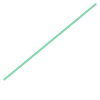

In [52]:
colombia = countries.loc[countries['name']=="Colombia", "geometry"].squeeze()
bogota = cities.loc[cities["name"]== "Bogota", "geometry"].squeeze()
venezuela = countries.loc[countries['name']=="Venezuela", "geometry"].squeeze()
caracas = cities.loc[cities["name"]== "Caracas", "geometry"].squeeze()

from shapely.geometry import LineString
line = LineString([bogota, caracas])
line

<AxesSubplot:>

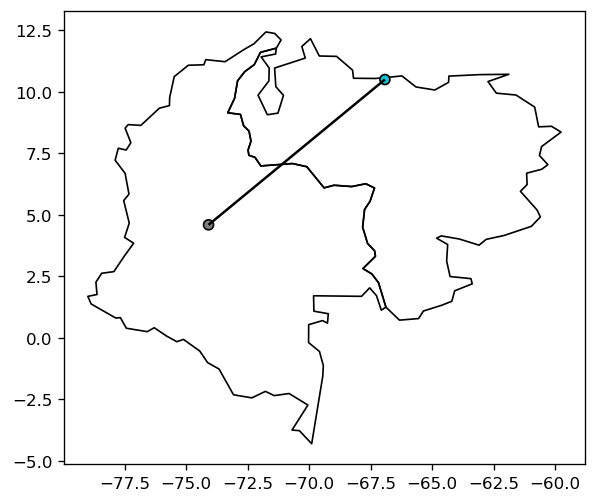

In [53]:
fig, ax= plt.subplots(figsize=(10,5), dpi=120)
geopandas.GeoSeries([colombia, venezuela, line, 
                     bogota, caracas]).plot(cmap="tab10", ax=ax, facecolor="none", edgecolor="k")

In [56]:
departamentos = geopandas.read_file("/Users/gloriacarrascal/trabajo-grado/colombia.geo.json")
departamentos.drop(columns="DPTO", inplace=True)
departamentos.head()

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."
3,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15950 10.42360, -75.15430 10.409..."
4,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460..."


<AxesSubplot:>

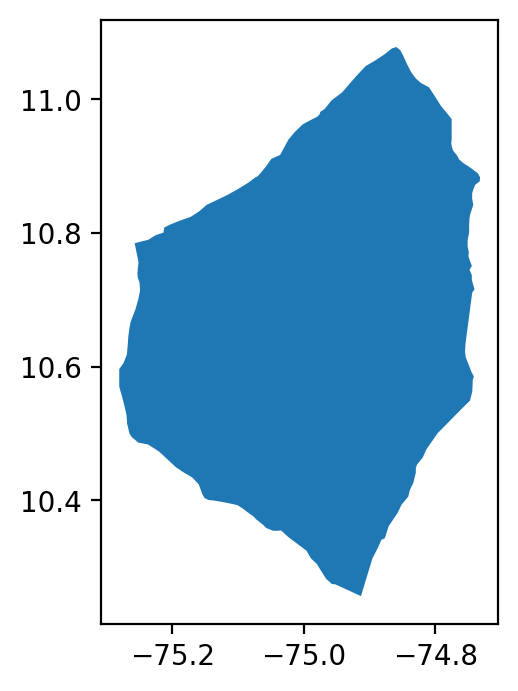

In [57]:
departamentos[departamentos['NOMBRE_DPT']=='ATLANTICO'].plot()

<AxesSubplot:>

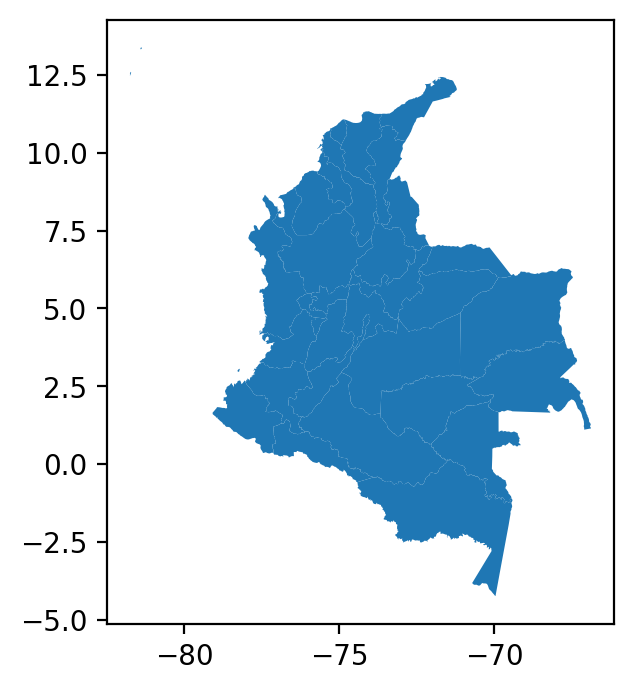

In [58]:
departamentos.plot()

<AxesSubplot:>

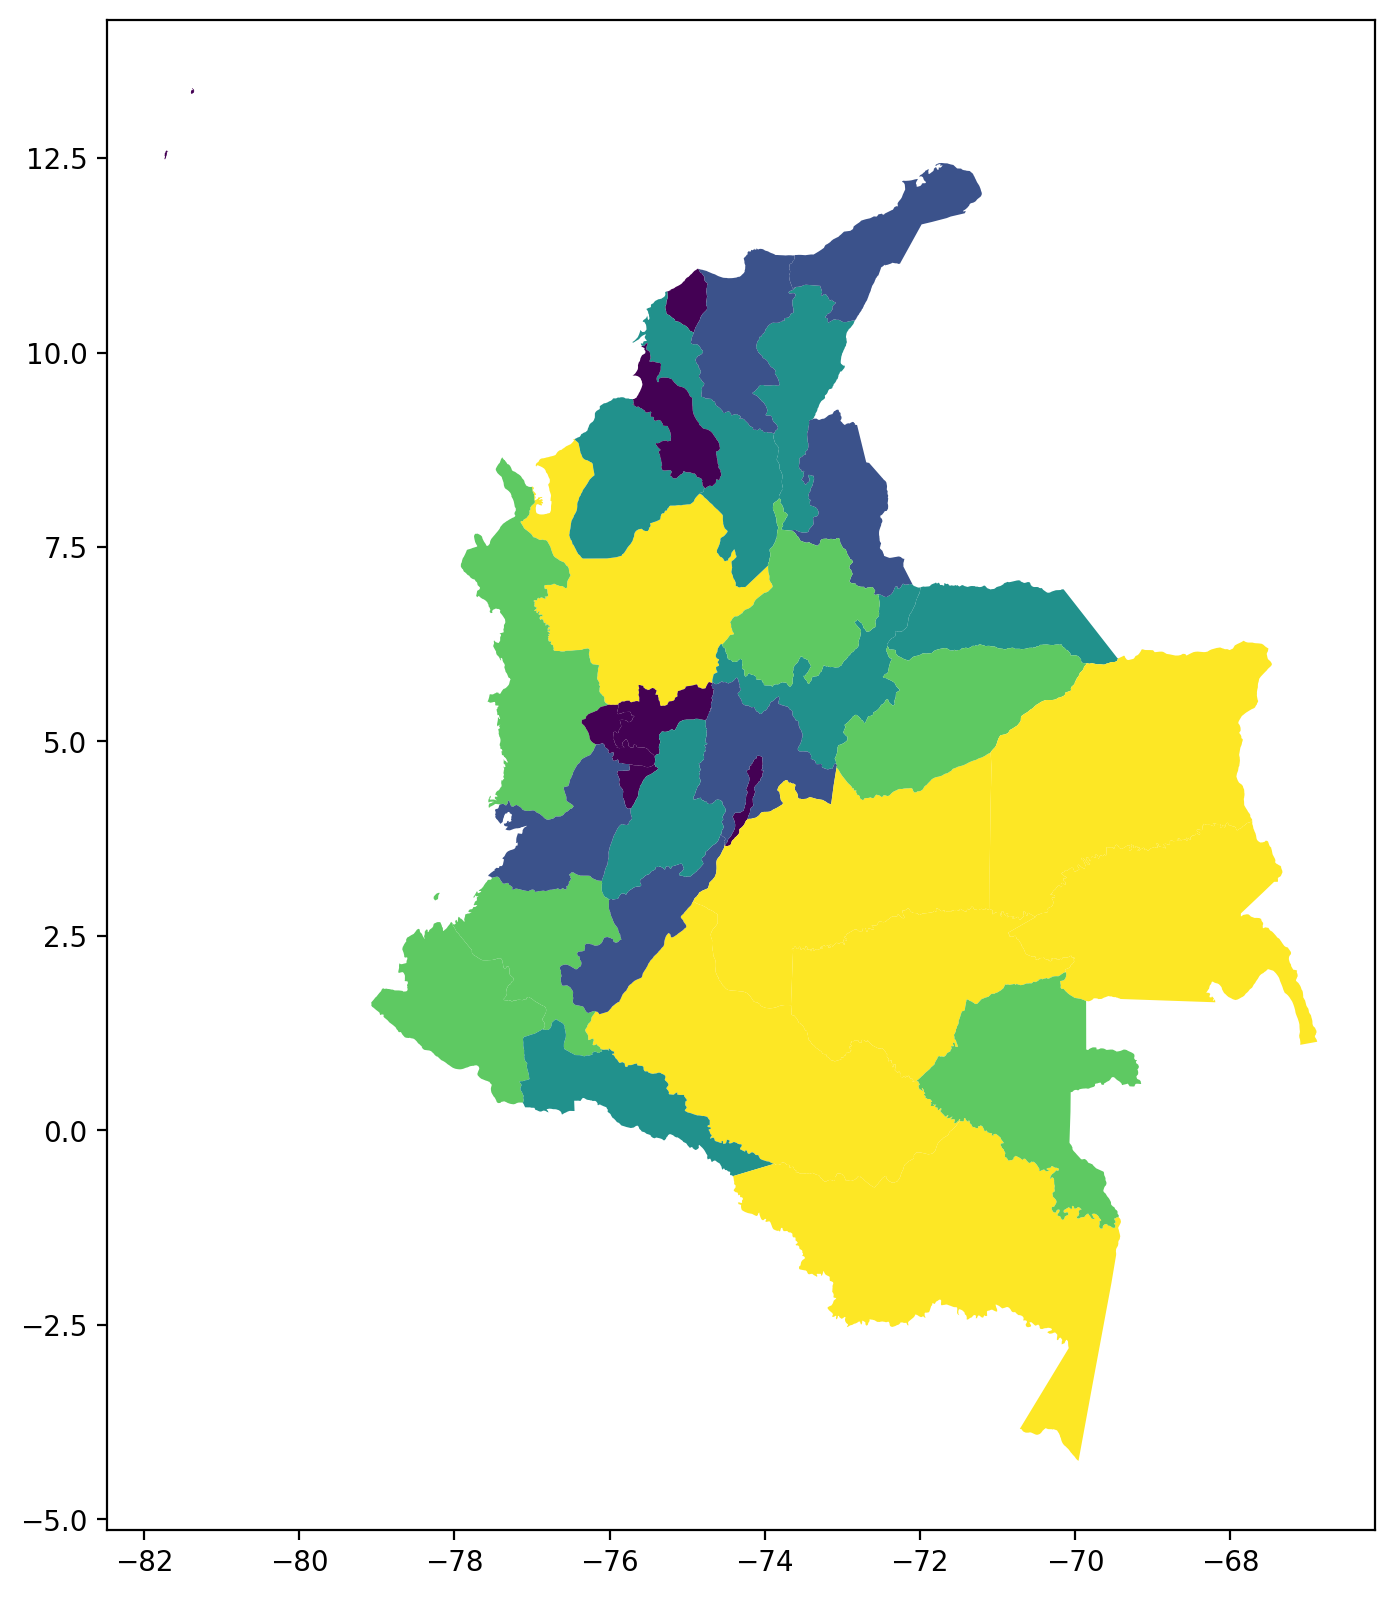

In [63]:
import mapclassify as mc

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={"aspect":"equal"})
departamentos.plot(column="AREA", scheme='Quantiles', ax=ax)

In [64]:
#!pip install mapclassify

In [65]:
mc.CLASSIFIERS

('BoxPlot',
 'EqualInterval',
 'FisherJenks',
 'FisherJenksSampled',
 'HeadTailBreaks',
 'JenksCaspall',
 'JenksCaspallForced',
 'JenksCaspallSampled',
 'MaxP',
 'MaximumBreaks',
 'NaturalBreaks',
 'Quantiles',
 'Percentiles',
 'PrettyBreaks',
 'StdMean',
 'UserDefined')

In [66]:
#ax = countries[countries['name']=="Colombia"].plot(figsize=(15, 15))
#departamentos.plot(ax=ax, color='cyan', markersize=10)

<AxesSubplot:>

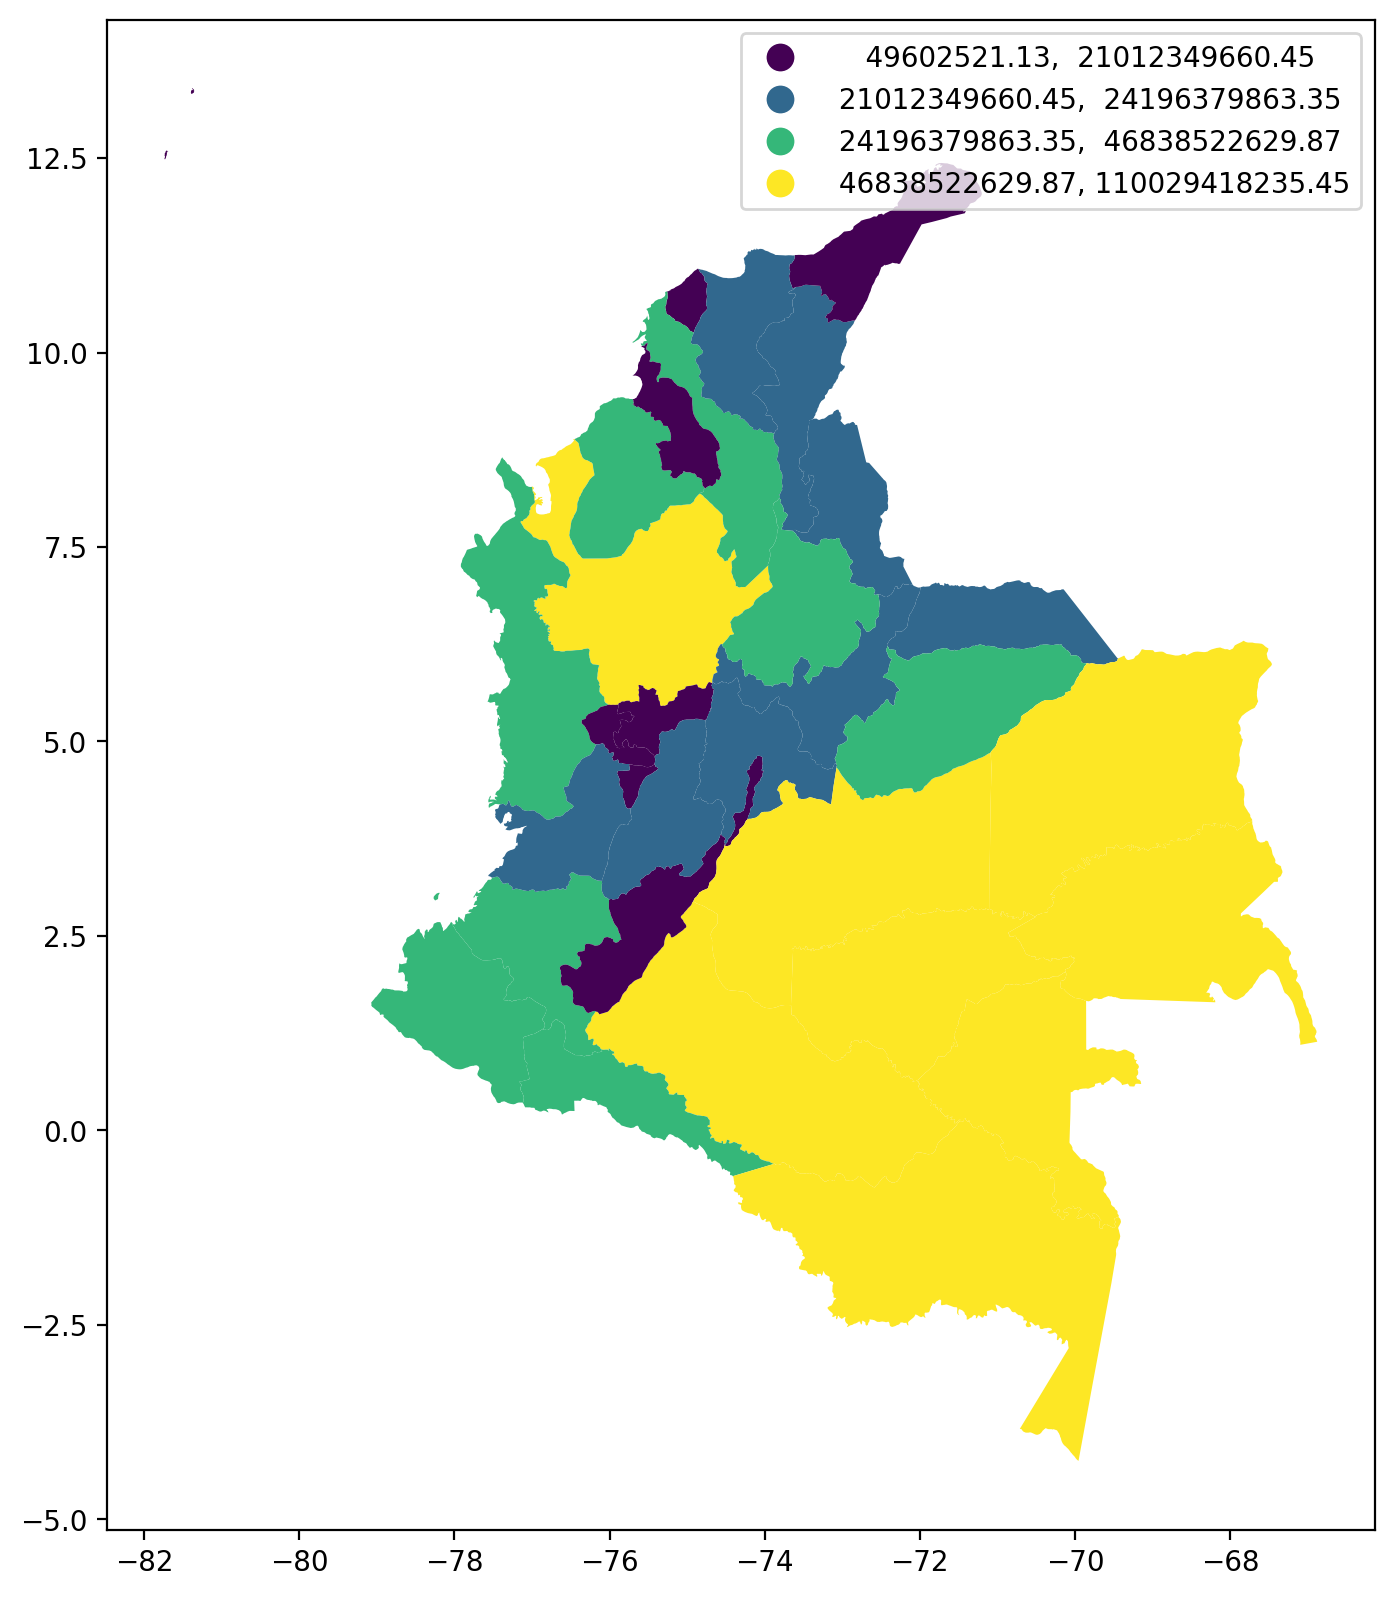

In [67]:

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={"aspect":"equal"})
departamentos.plot(column="AREA", scheme='Quantiles', legend=True, ax=ax, k = 4)

# Creating a point/ vecto Point from Polygon data

In [68]:
departamentos["point"] = departamentos.geometry.centroid

/var/folders/_8/stsrqpjs1q1559jp3dtpqv0c0000gn/T/ipykernel_7735/1503494539.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [69]:
departamentos.head(10)

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,point
0,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640...",POINT (-75.59396 6.91639)
1,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343...",POINT (-74.98258 10.66432)
2,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360...",POINT (-74.21445 4.28858)
3,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15950 10.42360, -75.15430 10.409...",POINT (-74.51694 8.71895)
4,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460...",POINT (-73.12335 5.75773)
5,CALDAS,7.558200e+09,603282.457,755819.988,"POLYGON ((-74.69500 5.75270, -74.68470 5.75100...",POINT (-75.33898 5.33200)
6,CAQUETA,9.018087e+10,1888506.901,9018086.883,"POLYGON ((-74.69260 2.49780, -74.68910 2.47930...",POINT (-73.98606 0.77601)
7,CAUCA,2.974279e+10,1243388.952,2974278.730,"MULTIPOLYGON (((-78.21162 2.97511, -78.24890 2...",POINT (-76.87351 2.39472)
8,CESAR,2.297310e+10,1080343.678,2297309.568,"POLYGON ((-73.28232 10.85625, -73.28062 10.838...",POINT (-73.53815 9.52776)
9,CORDOBA,2.505949e+10,814093.372,2505948.561,"POLYGON ((-75.81950 9.42300, -75.80910 9.41950...",POINT (-75.80195 8.35357)


In [70]:
departamentos['long']=departamentos.point.x
departamentos['lat']= departamentos.point.y
departamentos.head()

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,point,long,lat
0,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640...",POINT (-75.59396 6.91639),-75.593959,6.916388
1,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343...",POINT (-74.98258 10.66432),-74.982576,10.664320
2,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360...",POINT (-74.21445 4.28858),-74.214454,4.288579
3,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15950 10.42360, -75.15430 10.409...",POINT (-74.51694 8.71895),-74.516938,8.718946
4,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460...",POINT (-73.12335 5.75773),-73.123351,5.757728


In [71]:
fig = px.scatter_mapbox(departamentos, 
                       lat="lat",
                       lon="long",
                       hover_name="NOMBRE_DPT",
                       hover_data=["NOMBRE_DPT"],
                       color="NOMBRE_DPT",
                       zoom=3,
                       height=600,
                       #size="sz",
                        #size_max=30,
                       opacity=0.8,
                       width=1300)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(title_text="just a viz")
fig.show()

In [72]:
departamentos.shape

(33, 8)

In [73]:
departamentos['sz']= range(0, 33)

In [74]:
departamentos['sz']=departamentos['sz']/2

In [78]:
fig = px.scatter_mapbox(departamentos, 
                       lat="lat",
                       lon="long",
                       hover_name="NOMBRE_DPT",
                       hover_data=["NOMBRE_DPT"],
                       color="NOMBRE_DPT",
                       zoom=3,
                       height=700,
                       size="sz",
                        #size_max=30,
                       opacity=0.8,
                       width=1300)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(title_text="Example map with plotly.express")
fig.write_html("/Users/gloriacarrascal/trabajo-grado/graficas/colombia_departamentos.html")
fig.show()

<AxesSubplot:>

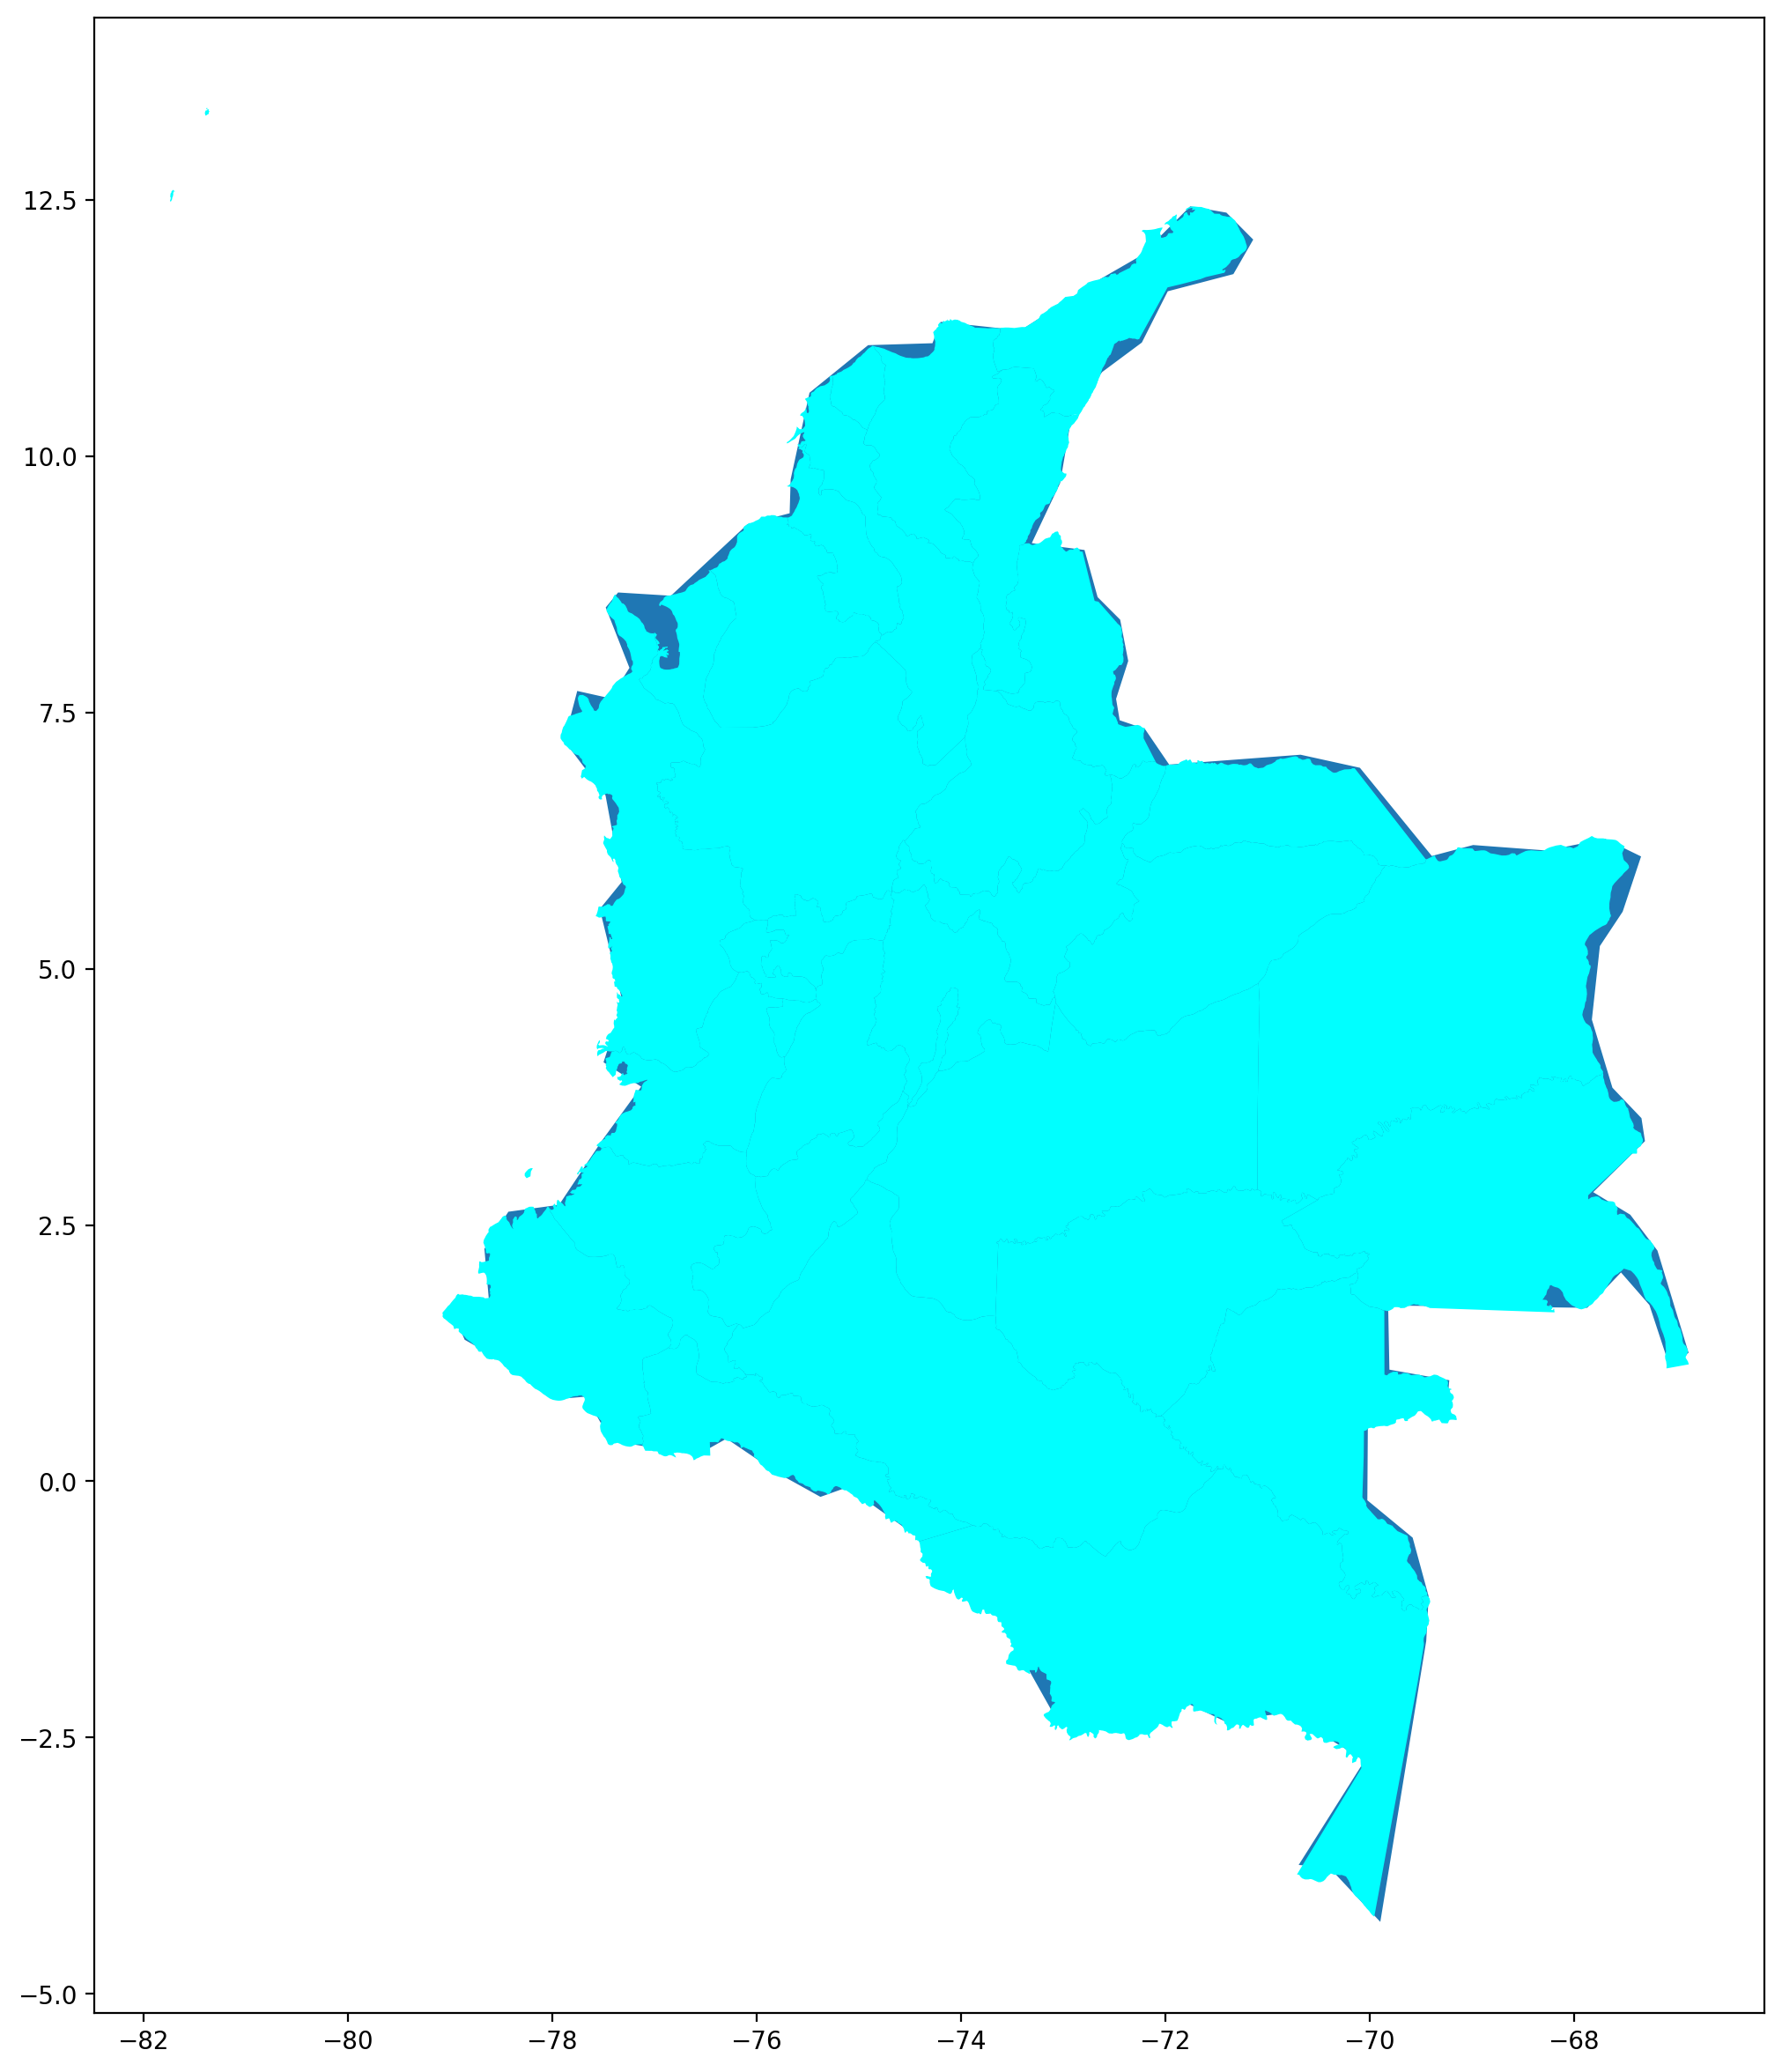

In [40]:
ax = countries[countries['name']=='Colombia'].plot(figsize=(15, 15))
departamentos.plot(ax=ax, color='cyan', markersize=10)


# Grouping by region


In [41]:
#departamentos['region']= departamentos[departamentos['NOMBRE_DPT']==]
region_caribe = ['ATLANTICO', 'BOLIVAR', 'CESAR', 'MAGDALENA', 'LA GUAJIRA', 'SUCRE', 'CORDOBA']
region_andina = ['ANTIOQUIA', 'CALDAS', 'NORTE DE SANTANDER', 'QUINDIO', 'RISARALDA', 'SANTANDER', 'BOYACA', 'CUNDINAMARCA', 'TOLIMA', 'HUILA', 'SANTAFE DE BOGOTA D.C']
region_amazonas = ['AMAZONAS', 'CAQUETA', 'GUAINIA', 'PUTUMAYO', 'GUAVIARE', 'VAUPES']
region_pacifica = [ 'CAUCA', 'CHOCO', 'NARIÑO', 'VALLE DEL CAUCA']
region_orinoquia = ['ARAUCA', 'CASANARE', 'META', 'VICHADA']
providencia = ['ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA']


In [42]:
reg_caribe= pd.DataFrame({'departamento':region_caribe})
reg_andina= pd.DataFrame({'departamento':region_andina})
reg_pacifica= pd.DataFrame({'departamento':region_pacifica})
reg_amazonas= pd.DataFrame({'departamento':region_amazonas})
reg_orinoquia= pd.DataFrame({'departamento':region_orinoquia})
reg_insular = pd.DataFrame({'departamento':providencia})

In [43]:
reg_caribe['Results'] = ['CARIBE' for dpto in reg_caribe['departamento'] ]
reg_andina['Results'] = ['ANDINA' for dpto in reg_andina['departamento'] ]
reg_pacifica['Results'] = ['PACIFICA' for dpto in reg_pacifica['departamento'] ]
reg_amazonas['Results'] = ['AMAZONAS' for dpto in reg_amazonas['departamento'] ]
reg_orinoquia['Results'] = ['ORINOQUIA' for dpto in reg_orinoquia['departamento'] ]
reg_insular['Results'] = ['INSULAR']
reg_caribe.head()

,departamento,Results
0,ATLANTICO,CARIBE
1,BOLIVAR,CARIBE
2,CESAR,CARIBE
3,MAGDALENA,CARIBE
4,LA GUAJIRA,CARIBE


In [44]:
#join all
total_regions = reg_caribe.append([reg_andina, reg_pacifica, reg_amazonas,reg_orinoquia, reg_insular], ignore_index = True)


/var/folders/_8/stsrqpjs1q1559jp3dtpqv0c0000gn/T/ipykernel_30075/2082793311.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [45]:
total_regions.shape

(33, 2)

In [46]:
sorted_regions = total_regions.sort_values(by='departamento', ascending= True, ignore_index=True)


In [47]:
df= departamentos.sort_values(by='NOMBRE_DPT', ascending= True, ignore_index=True)
df.tail(22)

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,point,long,lat,sz
11,CESAR,2.297310e+10,1080343.678,2.297310e+06,"POLYGON ((-73.28232 10.85625, -73.28062 10.838...",POINT (-73.53815 9.52776),-73.538155,9.527764,4.0
12,CHOCO,4.683852e+10,1797897.873,4.683852e+06,"POLYGON ((-77.02130 8.27170, -77.01380 8.27160...",POINT (-76.98398 5.98651),-76.983979,5.986510,5.5
13,CORDOBA,2.505949e+10,814093.372,2.505949e+06,"POLYGON ((-75.81950 9.42300, -75.80910 9.41950...",POINT (-75.80195 8.35357),-75.801955,8.353575,4.5
14,CUNDINAMARCA,2.280026e+10,1164175.024,2.280026e+06,"POLYGON ((-74.32960 5.74890, -74.32900 5.74140...",POINT (-74.11930 4.79912),-74.119302,4.799121,5.0
15,GUAINIA,7.211149e+10,1882807.190,7.211149e+06,"POLYGON ((-67.68780 3.86050, -67.68260 3.84430...",POINT (-68.80035 2.66670),-68.800350,2.666704,14.0
16,GUAVIARE,5.567148e+10,1555059.349,5.567148e+06,"POLYGON ((-71.26460 2.83750, -71.25940 2.83350...",POINT (-72.12679 1.89760),-72.126789,1.897605,14.5
17,HUILA,2.031870e+10,929144.166,2.031870e+06,"POLYGON ((-74.63600 3.27390, -74.64690 3.25430...",POINT (-75.63989 2.53904),-75.639887,2.539039,6.0
18,LA GUAJIRA,2.101235e+10,936598.020,2.101235e+06,"POLYGON ((-71.62120 12.42350, -71.59810 12.417...",POINT (-72.48230 11.44245),-72.482299,11.442451,6.5
19,MAGDALENA,2.284639e+10,916642.470,2.284639e+06,"POLYGON ((-74.09180 11.32770, -74.08260 11.324...",POINT (-74.28223 10.22926),-74.282229,10.229256,7.0
20,META,8.538969e+10,1680541.812,8.538969e+06,"POLYGON ((-71.07990 4.44490, -71.08610 4.18730...",POINT (-72.96615 3.31879),-72.966148,3.318787,7.5


In [48]:
print(df[df['NOMBRE_DPT']== 'GUAVIARE'])
print(sorted_regions[sorted_regions['departamento']== 'GUAVIARE'])

   NOMBRE_DPT          AREA    PERIMETER     HECTARES  \
16   GUAVIARE  5.567148e+10  1555059.349  5567147.669   

                                             geometry  \
16  POLYGON ((-71.26460 2.83750, -71.25940 2.83350...   

                        point       long       lat    sz  
16  POINT (-72.12679 1.89760) -72.126789  1.897605  14.5  
   departamento   Results
16     GUAVIARE  AMAZONAS


In [49]:
df['REGIONES'] = sorted_regions['Results']

In [50]:
df.tail()

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,point,long,lat,sz,REGIONES
28,SUCRE,1.082379e+10,688869.681,1.082379e+06,"POLYGON ((-75.48310 9.88490, -75.47910 9.87850...",POINT (-75.12332 9.06254),-75.123319,9.062541,10.5,CARIBE
29,TOLIMA,2.342127e+10,853045.779,2.342127e+06,"POLYGON ((-74.84000 5.28140, -74.82100 5.28080...",POINT (-75.26617 4.04415),-75.266171,4.044152,11.0,ANDINA
30,VALLE DEL CAUCA,2.214683e+10,995449.434,2.214683e+06,"POLYGON ((-76.08380 4.97360, -76.06770 4.96020...",POINT (-76.53405 3.86550),-76.534053,3.865499,11.5,PACIFICA
31,VAUPES,5.308784e+10,1666564.449,5.308784e+06,"POLYGON ((-70.11300 1.98530, -70.11470 1.97610...",POINT (-70.57439 0.61025),-70.574390,0.610248,15.0,AMAZONAS
32,VICHADA,1.000553e+11,1781121.957,1.000553e+07,"POLYGON ((-67.79690 6.27950, -67.76810 6.27190...",POINT (-69.43305 4.66898),-69.433052,4.668981,15.5,ORINOQUIA


In [51]:
print("CARIBE")
print("long", df[df['REGIONES']== 'CARIBE'].long.describe())
print("_ _"*15)
print("lat", df[df['REGIONES']== 'CARIBE'].lat.describe())
print("_ _"*15)
print("AMAZONAS")
print("long", df[df['REGIONES']== 'AMAZONAS'].long.describe())
print("_ _"*15)
print("lat", df[df['REGIONES']== 'AMAZONAS'].lat.describe())
print("_ _"*15)
print("ORINOQUIA")
print("long", df[df['REGIONES']== 'ORINOQUIA'].long.describe())
print("_ _"*15)
print("lat", df[df['REGIONES']== 'ORINOQUIA'].lat.describe())
print("_ _"*15)
print("ANDINA")
print("long", df[df['REGIONES']== 'ANDINA'].long.describe())
print("_ _"*15)
print("lat", df[df['REGIONES']== 'ANDINA'].lat.describe())
print("_ _"*15)
print("PACIFICA")
print("long", df[df['REGIONES']== 'PACIFICA'].long.describe())
print("_ _"*15)
print("lat", df[df['REGIONES']== 'PACIFICA'].lat.describe())
print("_ _"*15)
print("INSULAR")
print("long", df[df['REGIONES']== 'INSULAR'].long.describe())
print("_ _"*15)
print("lat", df[df['REGIONES']== 'INSULAR'].lat.describe())
print("_ _"*15)


CARIBE
long count     7.000000
mean    -74.389639
std       1.101152
min     -75.801955
25%     -75.052947
50%     -74.516938
75%     -73.910192
max     -72.482299
Name: long, dtype: float64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
lat count     7.000000
mean      9.714122
std       1.114758
min       8.353575
25%       8.890743
50%       9.527764
75%      10.446788
max      11.442451
Name: lat, dtype: float64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
AMAZONAS
long count     6.000000
mean    -72.146642
std       2.500575
min     -75.865123
25%     -73.521242
50%     -71.826965
75%     -70.812578
max     -68.800350
Name: long, dtype: float64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
lat count    6.000000
mean     0.804632
std      1.444479
min     -1.561405
25%      0.481538
50%      0.693127
75%      1.617205
max      2.666704
Name: lat, dtype: float64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
ORINOQUIA
long count     4.000000
mean    -71.252182
std       1.466839
min 

In [52]:
print("longitude", df[df['REGIONES']== 'CARIBE'].long.describe())
print("latitude", df[df['REGIONES']== 'CARIBE'].lat.describe())

longitude count     7.000000
mean    -74.389639
std       1.101152
min     -75.801955
25%     -75.052947
50%     -74.516938
75%     -73.910192
max     -72.482299
Name: long, dtype: float64
latitude count     7.000000
mean      9.714122
std       1.114758
min       8.353575
25%       8.890743
50%       9.527764
75%      10.446788
max      11.442451
Name: lat, dtype: float64


**Droppping the Columns that I am not using**

In [53]:
df.drop(columns='DPTO', inplace=True)

KeyError: "['DPTO'] not found in axis"

In [54]:
df.head()

,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,point,long,lat,sz,REGIONES
0,AMAZONAS,1.100294e+11,2562641.642,1.100294e+07,"POLYGON ((-71.38640 0.11860, -71.37610 0.11160...",POINT (-71.52714 -1.56140),-71.527141,-1.561405,13.5,AMAZONAS
1,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640...",POINT (-75.59396 6.91639),-75.593959,6.916388,0.0,ANDINA
2,ARAUCA,2.419638e+10,843446.026,2.419638e+06,"POLYGON ((-70.69870 7.05930, -70.69350 7.05290...",POINT (-70.98664 6.53658),-70.986638,6.536576,12.0,ORINOQUIA
3,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,4.960252e+07,71946.251,4.960252e+03,"MULTIPOLYGON (((-81.71296 12.59456, -81.71284 ...",POINT (-81.56578 12.91134),-81.565781,12.911343,16.0,INSULAR
4,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((-74.87060 10.36120, -74.87640 10.343...",POINT (-74.98258 10.66432),-74.982576,10.664320,0.5,CARIBE


In [55]:
fig = px.scatter_mapbox(df, 
                       lat="lat",
                       lon="long",
                       hover_name="NOMBRE_DPT",
                       hover_data=["NOMBRE_DPT"],
                       color="REGIONES",
                       zoom=3,
                       height=700,
                       size="sz",
                        #size_max=30,
                       opacity=0.8,
                       width=1300)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(title_text="just a viz")
fig.show()

<Figure size 3000x3000 with 0 Axes>

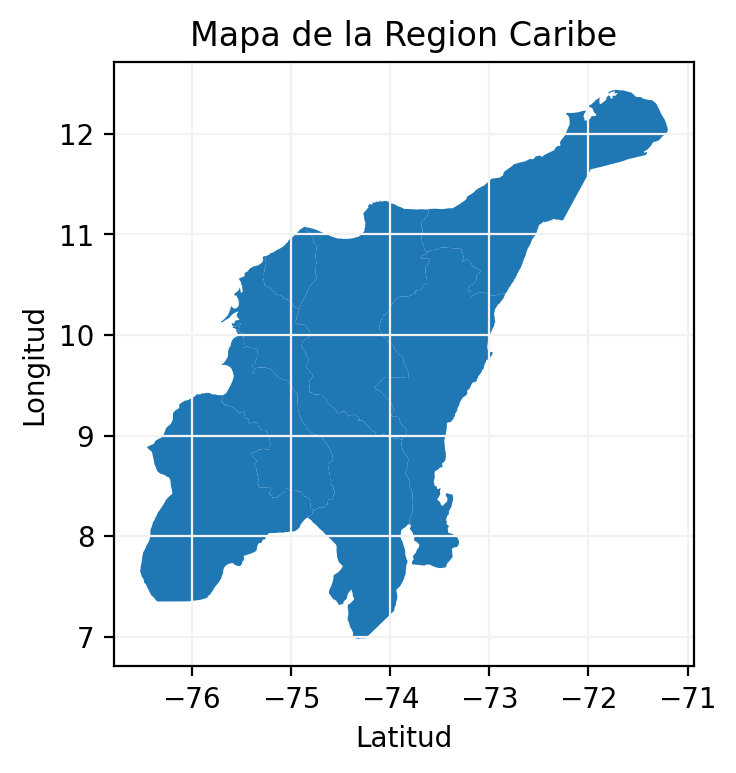

In [57]:
plt.figure(figsize=(15, 15))
df[df['REGIONES']=='CARIBE'].plot(legend=True, k =6)
plt.grid(color='0.95')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Mapa de la Region Caribe')
plt.show()